Import necessary libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Data Collection

In [ ]:
df = pd.read_csv('../data/Insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Check the data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [42]:
df.shape

(1338, 7)

Check for Missing Values & Duplicates

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [43]:
duplicate_count = df.duplicated().sum()
print(f"duplicate rows: {duplicate_count}")

duplicate rows: 1


In [44]:
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")

Duplicates removed. New shape: (1337, 7)


Basic Statistics (Descriptive Statistics)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
for column in ['sex', 'smoker', 'region']:
    print(f"\n{column} value counts:")
    print(df[column].value_counts())


sex value counts:
sex
male      675
female    662
Name: count, dtype: int64

smoker value counts:
smoker
no     1063
yes     274
Name: count, dtype: int64

region value counts:
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


C:\Users\milan\AppData\Local\Temp\ipykernel_30212\2732539315.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


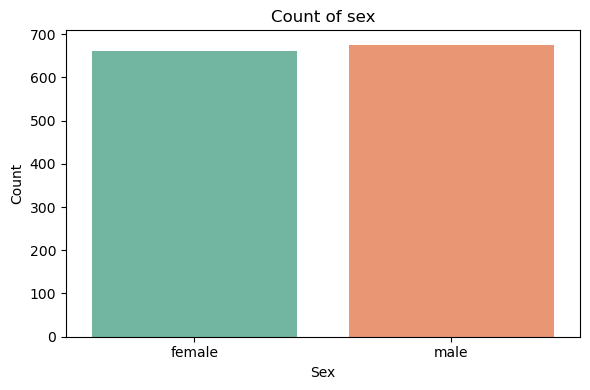

C:\Users\milan\AppData\Local\Temp\ipykernel_30212\2732539315.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


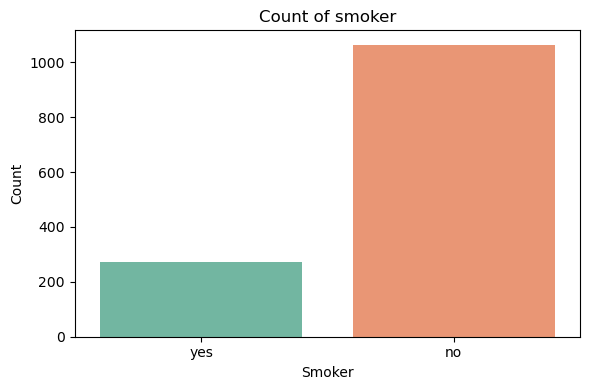

C:\Users\milan\AppData\Local\Temp\ipykernel_30212\2732539315.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


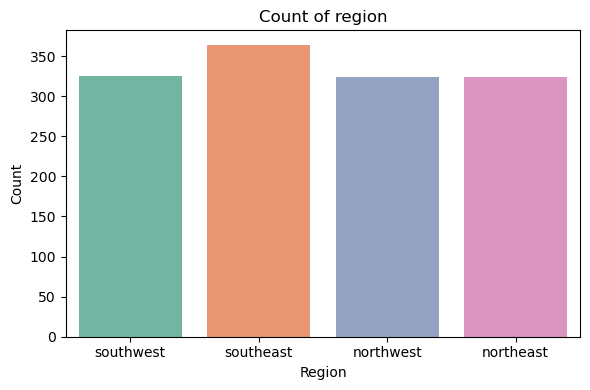

In [ ]:
categorical_cols = ['sex', 'smoker', 'region']

for column in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df, palette='Set2')
    plt.title(f'Count of {column}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


Label Encoding for smoker column

In [45]:
le_smoker = LabelEncoder()
df['smoker'] = le_smoker.fit_transform(df['smoker'])

One-Hot Encoding for sex & region columns

In [46]:
df = pd.get_dummies(df, columns=['sex', 'region'], drop_first=True)


In [47]:
df.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'sex_male',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

Create new feature from Age Column (Feature Engineering)

In [48]:
df['age_group'] = pd.cut(df['age'],
                                bins=[0, 18, 35, 50, 65, 100],
                                labels=['Under 18', '18-35', '36-50', '51-65', 'Over 65'])

In [49]:
for col in df.columns:
    if col != 'age_group':
        df[col] = df[col].astype('float64')

In [50]:
df

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest,age_group
0,19.0,27.900,0.0,1.0,16884.92400,0.0,0.0,0.0,1.0,18-35
1,18.0,33.770,1.0,0.0,1725.55230,1.0,0.0,1.0,0.0,Under 18
2,28.0,33.000,3.0,0.0,4449.46200,1.0,0.0,1.0,0.0,18-35
3,33.0,22.705,0.0,0.0,21984.47061,1.0,1.0,0.0,0.0,18-35
4,32.0,28.880,0.0,0.0,3866.85520,1.0,1.0,0.0,0.0,18-35
...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,0.0,10600.54830,1.0,1.0,0.0,0.0,36-50
1334,18.0,31.920,0.0,0.0,2205.98080,0.0,0.0,0.0,0.0,Under 18
1335,18.0,36.850,0.0,0.0,1629.83350,0.0,0.0,1.0,0.0,Under 18
1336,21.0,25.800,0.0,0.0,2007.94500,0.0,0.0,0.0,1.0,18-35


Random Forest Model


In [52]:
# Split data
X = df.drop(['charges', 'age_group'], axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.8796647242338906
MAE: 2638.9050403126867
RMSE: 4702.375637917557


Save model

In [53]:
import pickle
with open('insurance_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('insurance_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
# 56,female,39.82,0,no,southeast,11090.7178

import pandas as pd

input_data = pd.DataFrame({
    'age': [56],
    'bmi': [39.82],
    'children': [0],
    'smoker': [0], # non-smoker 0, smoker 1
    'sex_male': [0], # male 1, female 0
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0] # if all Zeros, it means northeast [reference category]
})
# Make prediction
prediction = model.predict(input_data)[0]
prediction

np.float64(11189.51244759999)